## Sirada Thoungvitayasutee 301292632

### 1. Generate Swiss roll dataset. 

In [1]:
from sklearn import datasets, manifold
import matplotlib.pyplot as plt

#Generate swiss roll dataset

sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=42)
print(f'Points: {sr_points.shape}')
print(sr_color.shape)

#Ref https://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html#sphx-glr-auto-examples-manifold-plot-swissroll-py

Points: (1500, 3)
(1500,)


### 2. Plot the resulting generated Swiss roll dataset.

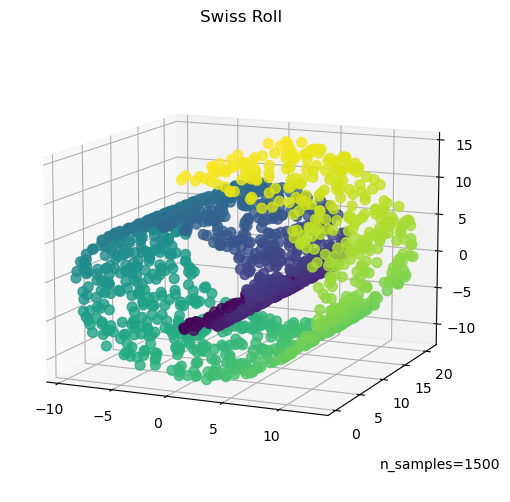

In [2]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
fig.add_axes(ax)
ax.scatter( sr_points[:,0], sr_points[:,1], sr_points[:,2], c=sr_color,s=50,alpha=0.8)
ax.set_title('Swiss Roll')
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8,0.05, s='n_samples=1500', transform=ax.transAxes)

### 3. Use Kernel PCA (kPCA) with linear kernel (2 points), a RBF kernel (2 points), and a sigmoid kernel (2 points).

In [3]:
from sklearn.decomposition import KernelPCA

#linear kernel
kpca_linear = KernelPCA(n_components=2, kernel='linear')
X_kpca_linear = kpca_linear.fit_transform(sr_points)

X_kpca_linear

array([[ 3.78697979,  8.35201835],
       [12.43901435,  2.76756209],
       [-6.16047199, -8.73188234],
       ...,
       [-3.0255778 , 10.72658897],
       [ 3.35632241,  8.68133213],
       [ 8.41137421, -7.07874158]])

In [4]:
#RBF kernel
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca_rbf = kpca_rbf.fit_transform(sr_points)

X_kpca_rbf

array([[-0.07990854, -0.09583686],
       [-0.04710243, -0.0373195 ],
       [-0.04385199, -0.03086884],
       ...,
       [-0.06421114, -0.07486191],
       [-0.07617957, -0.0731749 ],
       [-0.05079842, -0.04577528]])

In [5]:
#sigmoid kernel
kpca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.1)
X_kpca_sigmoid = kpca_sigmoid.fit_transform(sr_points)

X_kpca_sigmoid

array([[-0.28090398,  0.58233998],
       [-0.77227365,  0.15302929],
       [ 0.61910779, -1.2349323 ],
       ...,
       [ 0.20639383,  1.0674321 ],
       [-0.43608903,  0.82756027],
       [-0.25853418, -0.21981741]])

### 4. Plot the kPCA results of applying the linear kernel (2 points), a RBF kernel (2 points), and a sigmoid kernel (2 points) from (3). Explain and compare the results

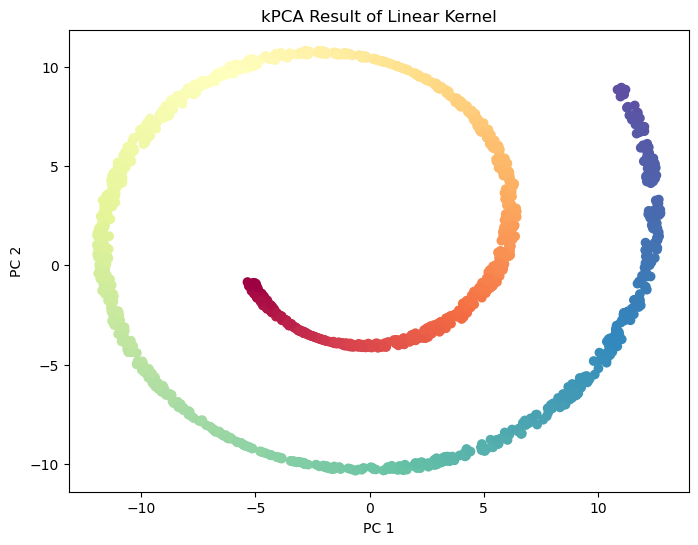

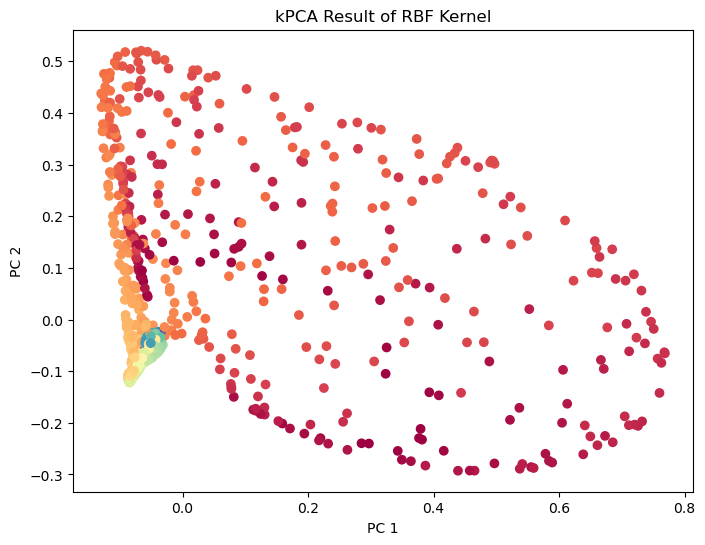

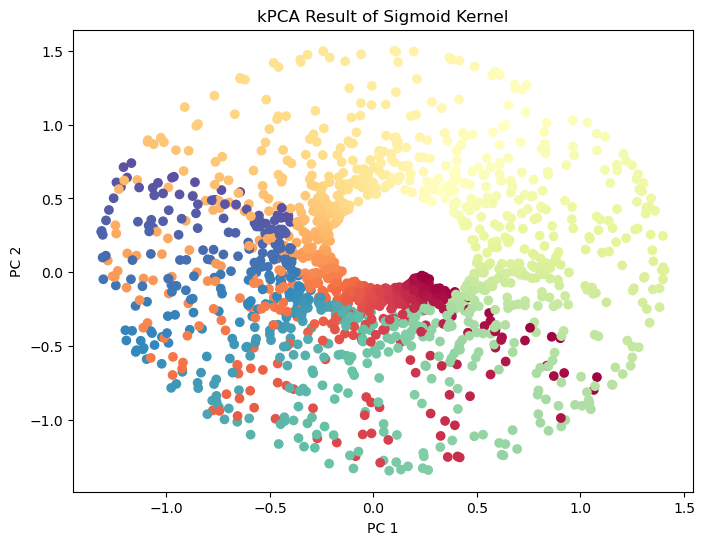

In [6]:
#plot KPCA result

def plot_kpca(X_transformed, title):
    plt.figure(figsize=(8,6))
    plt.scatter(X_transformed[:,0], X_transformed[:,1], c=sr_color, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.show()
    
#plor the linear kernel
plot_kpca(X_kpca_linear, 'kPCA Result of Linear Kernel')

#plot the RBF kernel
plot_kpca(X_kpca_rbf, 'kPCA Result of RBF Kernel')

#plot the sigmoid kernel
plot_kpca(X_kpca_sigmoid, 'kPCA Result of Sigmoid Kernel')

### Explaination and Comparision: 
Linear Kernel: The result shows a circular shape with a continuous gradient of colors.

RBF Kernel: The result shows a non-linearity into the data projection in a scattered-pattern.

Sigmoid Kernel: The result also shows a non-linearity in a donut-like shapes. 

### 5. Using kPCA and a kernel of your choice, apply Logistic Regression for classification. Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline. Print out best parameters found by GridSearchCV.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

#bin color to discrete class low, medium and high
print(f'sr_color_orinigal:{sr_color}')
sr_color_binned = np.digitize(sr_color, bins=np.percentile(sr_color, [33,66]))
print(f'st_color_binned:{sr_color_binned}')

#create a pipeline and apply logistic regression
pipeline = Pipeline([
    ('kpca',KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [
    {'kpca__kernel':['rbf', 'sigmoid'],
     'kpca__gamma':np.linspace(0.03,0.05,10)}
]
     

#grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy',error_score='raise')
grid_search.fit(sr_points, sr_color_binned)

#print the best parameter
print(f'Best parameters: {grid_search.best_params_}')

best_accuracy = grid_search.best_score_
print(f'best accuracy:{best_accuracy}')

sr_color_orinigal:[ 8.24234644 13.67266022 11.61126935 ...  9.08071743  8.29178563
 12.84911693]
st_color_binned:[1 2 2 ... 1 1 2]
Best parameters: {'kpca__gamma': 0.04777777777777778, 'kpca__kernel': 'rbf'}
0.858


### 6. Plot the results from using GridSearchCV

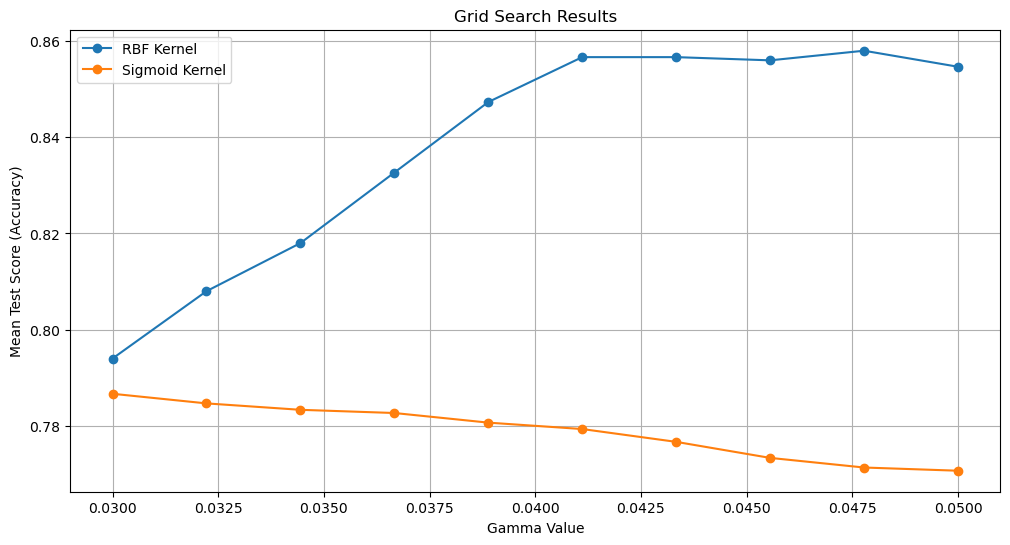

In [22]:
import pandas as pd

#get result
results = grid_search.cv_results_

#convert results to data frame
results_dataframe = pd.DataFrame(results)

#plot the accuracy
plt.figure(figsize=(12,6))

#RBF
rbf_results = results_dataframe[results_dataframe['param_kpca__kernel']=='rbf']
plt.plot(rbf_results['param_kpca__gamma'], rbf_results['mean_test_score'],label='RBF Kernel', marker='o')

#sigmoid
sigmoid_results = results_dataframe[results_dataframe['param_kpca__kernel']=='sigmoid']
plt.plot(sigmoid_results['param_kpca__gamma'], sigmoid_results['mean_test_score'],label='Sigmoid Kernel', marker='o')

plt.xlabel('Gamma Value')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results')
plt.legend()
plt.grid(True)
plt.show()